# NEHA RAGESH NAMBIAR
# 20BRS1110

 IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cell_samples.csv")
df.head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df.size

7689

In [6]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [7]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

 DISTRIBUTION OF CLASSES

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

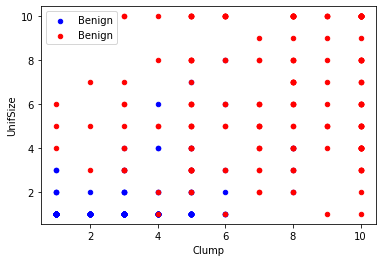

In [8]:
benign_df = df[df['Class'] == 2][0:200]
malignant_df = df[df['Class'] == 4][0:200]


axes = benign_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'blue', label = 'Benign')

malignant_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'red', label = 'Benign',ax = axes)

SELECTION OF UNWANTED COLUMNS AND THEIR REMOVAL

In [10]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [11]:
df = df[pd.to_numeric(df['BareNuc'],errors = 'coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [14]:
df.columns
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X = np.asarray(feature_df)
# independent variable

y = np.asarray(df['Class'])
#dependent variable

y[0:5]


array([2, 2, 2, 2, 2], dtype=int64)

DIVIDING THE DATA INTO TRAIN AND TEST DATASET

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(137,)

MODELLING

In [17]:
from sklearn import svm

classifier = svm.SVC(kernel = 'linear', gamma='auto', C=2)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



# SELF GENERATED DATASET

In [19]:
np.random.seed(0)
X = np.r_[np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]]
Y = [0]*20+[1]*20

In [29]:
clf = svm.SVC(kernel='linear')
clf.fit(X,Y)

SVC(kernel='linear')

In [21]:
w = clf.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-5,5)
yy = a*xx - (clf.intercept_[0])/w[1]

In [22]:
b = clf.support_vectors_[0]
yy_down = a*xx + (b[1]- a*b[0])

b = clf.support_vectors_[-1]
yy_up = a*xx + (b[1]- a*b[0])

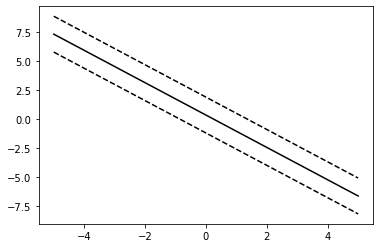

In [23]:
plt.plot(xx,yy,'k-')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

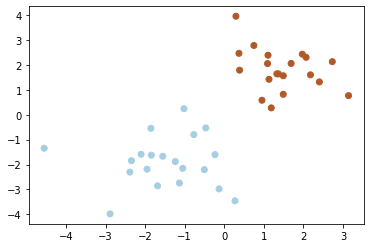

In [24]:
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=80,facecolors='none')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired)

In [30]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [31]:
y = np.array([-1,-1,1,1,1])

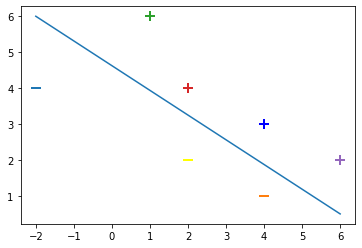

In [32]:
for d,sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
        
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

plt.plot([-2,6],[6,0.5])

In [33]:
def svm_sgd_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 100000
    errors = []

    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

In [ ]:
w = svm_sgd_plot(X,y)

In [35]:
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]
print(x2,x3)

[1.5887611677029299, 3.174580551480781, -3.174580551480781, 1.5887611677029299] [1.5887611677029299, 3.174580551480781, 3.174580551480781, -1.5887611677029299]


In [36]:
x2x3 =np.array([x2,x3])
print(x2x3)

[[ 1.58876117  3.17458055 -3.17458055  1.58876117]
 [ 1.58876117  3.17458055  3.17458055 -1.58876117]]


(1.5887611677029299, 1.5887611677029299) (3.174580551480781, 3.174580551480781) (-3.174580551480781, 3.174580551480781) (1.5887611677029299, -1.5887611677029299)


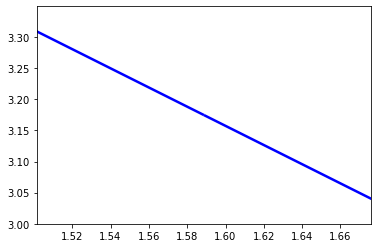

In [37]:
X,Y,U,V = zip(*x2x3)
print(X,Y,U,V)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')